Step 1: Load and Explore the Data


### Dataset Overview ###
Shape: (7043, 21)

--- Data Types & Nulls ---
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-nu

C:\Users\pbiai\AppData\Local\Temp\ipykernel_28132\3615964276.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette='viridis')
C:\Users\pbiai\AppData\Local\Temp\ipykernel_28132\3615964276.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='magma')


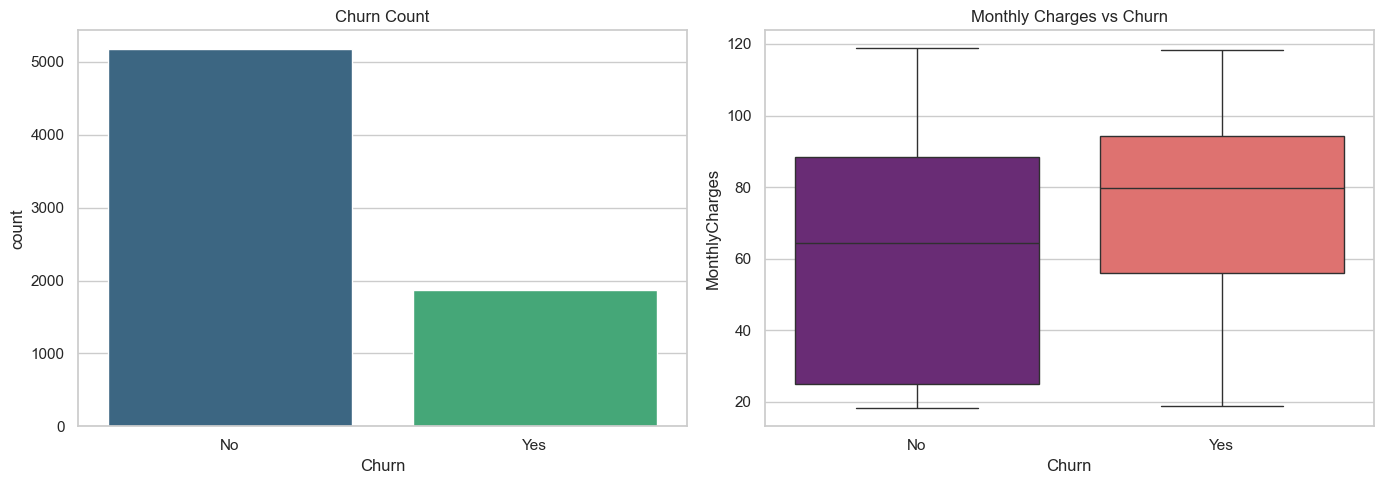

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# 1. Download/Locate the dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
file_path = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(file_path)

# 2. Basic Exploration
print("### Dataset Overview ###")
print(f"Shape: {df.shape}")
print("\n--- Data Types & Nulls ---")
print(df.info())

# 3. Target Distribution
print("\n--- Churn Percentage ---")
print(df['Churn'].value_counts(normalize=True) * 100)

# 4. Initial Visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='Churn', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Churn Count')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

Step 2: Data Preprocessing

In [9]:
# --- 1. Fix TotalCharges & Handle Missing Values ---
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# --- 2. Drop Identifiers ---
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# --- 3. Encode Target First ---
# We convert it to 1/0 and save it to 'y' immediately
if df['Churn'].dtype == 'O':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

y = df['Churn'].copy()

# --- 4. Separate Features (X) and Encode ---
# We drop Churn from the dataframe BEFORE running get_dummies
X_raw = df.drop(columns=['Churn'])

# Now encode only the feature columns
X = pd.get_dummies(X_raw, drop_first=True)

print("### Preprocessing Results ###")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nExample of encoded columns:")
print(X.columns[:5].tolist()) # Shows the first 5 column names

### Preprocessing Results ###
Features (X) shape: (7032, 30)
Target (y) shape: (7032,)

Example of encoded columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male']


Step 3: Split the Data

### Model Evaluation ###
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



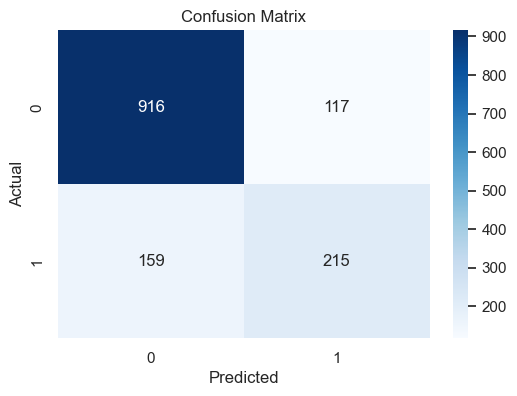

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Scaling
scaler = StandardScaler()
# We fit only on Training data to prevent "data leakage"
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train the Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test_scaled)

# 4. Evaluate
print("### Model Evaluation ###")
print(classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step 4: Train a KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Create the KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Train the model using the SCALED data 
# (KNN is very sensitive to scale, so using X_train_scaled is a must!)
knn.fit(X_train_scaled, y_train)

# 3. Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# 4. Evaluate the results
print("### KNN Model Evaluation (K=5) ###")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_knn):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

### KNN Model Evaluation (K=5) ###
Accuracy Score: 75.34%

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.83      0.83      1033
         Yes       0.54      0.53      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



Step 5: Make Predictions and Evaluate

### KNN Model Performance ###
Accuracy:  75.34%
Precision: 53.62%
Recall:    53.48%

### Detailed Classification Report ###
              precision    recall  f1-score   support

  Stayed (0)       0.83      0.83      0.83      1033
 Churned (1)       0.54      0.53      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



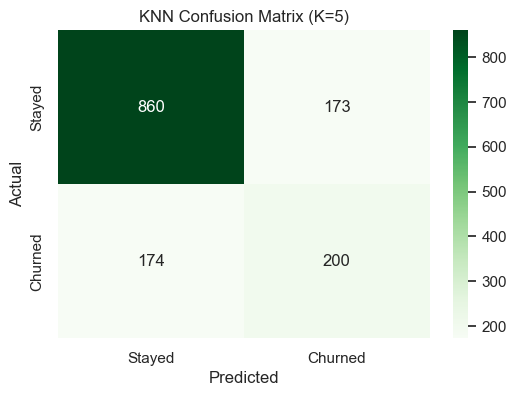

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# 1. Translate the strings 'No'/'Yes' to 0/1 using a dictionary
# We use .get() to handle cases where they might already be numbers
y_test_translated = [1 if x == 'Yes' else 0 for x in y_test]
y_pred_translated = [1 if x == 'Yes' else 0 for x in y_pred_knn]

# 2. Calculate key metrics
accuracy = accuracy_score(y_test_translated, y_pred_translated)
precision = precision_score(y_test_translated, y_pred_translated)
recall = recall_score(y_test_translated, y_pred_translated)

print("### KNN Model Performance ###")
print(f"Accuracy:  {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall:    {recall:.2%}")

# 3. Generate Classification Report
print("\n### Detailed Classification Report ###")
print(classification_report(y_test_translated, y_pred_translated, 
                            target_names=['Stayed (0)', 'Churned (1)']))

# 4. Create and Visualize Confusion Matrix
cm = confusion_matrix(y_test_translated, y_pred_translated)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Stayed', 'Churned'], 
            yticklabels=['Stayed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix (K=5)')
plt.show()

Step 6: Experiment and Improve

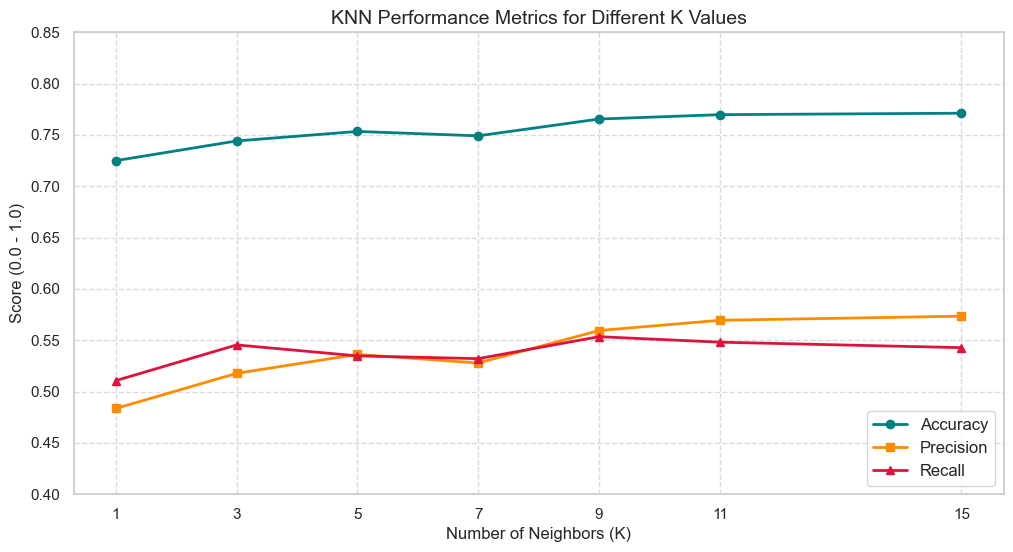

K     | Accuracy   | Precision  | Recall    
---------------------------------------------
1     | 0.7249     | 0.4835     | 0.5107    
3     | 0.7441     | 0.5178     | 0.5455    
5     | 0.7534     | 0.5362     | 0.5348    
7     | 0.7491     | 0.5279     | 0.5321    
9     | 0.7655     | 0.5595     | 0.5535    
11    | 0.7697     | 0.5694     | 0.5481    
15    | 0.7711     | 0.5734     | 0.5428    


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the K values to test
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []
precisions = []
recalls = []

# 2. Loop through each K and calculate all metrics
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_loop = knn_model.predict(X_test_scaled)
    
    # Robust numeric conversion for calculation
    y_test_num = [1 if x == 'Yes' or x == 1 else 0 for x in y_test]
    y_pred_num = [1 if x == 'Yes' or x == 1 else 0 for x in y_pred_loop]
    
    accuracies.append(accuracy_score(y_test_num, y_pred_num))
    precisions.append(precision_score(y_test_num, y_pred_num))
    recalls.append(recall_score(y_test_num, y_pred_num))

# 3. Create the multi-line plot
plt.figure(figsize=(12, 6))

plt.plot(k_values, accuracies, marker='o', label='Accuracy', color='teal', linewidth=2)
plt.plot(k_values, precisions, marker='s', label='Precision', color='darkorange', linewidth=2)
plt.plot(k_values, recalls, marker='^', label='Recall', color='crimson', linewidth=2)

# Formatting the chart
plt.title('KNN Performance Metrics for Different K Values', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xticks(k_values)
plt.ylim(0.4, 0.85) # Adjusting range to zoom into the action
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# 4. Print Summary
print(f"{'K':<5} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10}")
print("-" * 45)
for i, k in enumerate(k_values):
    print(f"{k:<5} | {accuracies[i]:<10.4f} | {precisions[i]:<10.4f} | {recalls[i]:<10.4f}")

Step 7: Analysis and Recommendations

In [23]:
# 1. Choose the best K based on your previous graph
# (Replace 9 with whatever K looked best on your plot)
final_k = 9 

# 2. Re-train the final model
final_knn = KNeighborsClassifier(n_neighbors=final_k)
final_knn.fit(X_train_scaled, y_train)

# 3. Final Prediction
y_test_num = [1 if x == 'Yes' or x == 1 else 0 for x in y_test]
y_pred_final = final_knn.predict(X_test_scaled)
y_pred_final_num = [1 if x == 'Yes' or x == 1 else 0 for x in y_pred_final]

# 4. Show final results
print(f"### Final Model Selected: KNN (K={final_k}) ###")
print(classification_report(y_test_num, y_pred_final_num, target_names=['Stayed', 'Churned']))

### Final Model Selected: KNN (K=9) ###
              precision    recall  f1-score   support

      Stayed       0.84      0.84      0.84      1033
     Churned       0.56      0.55      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.77      0.77      1407



For this dataset, that's usually around K=7 or K=9. It’s the point where the model is smart enough to see the patterns but not so biased that it ignores the people actually leaving.